Tutorial from: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy import stats
from scipy.stats import skew
import warnings
import math
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


### Visualisation of House Prices

In [4]:
train_df["SalePrice"].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

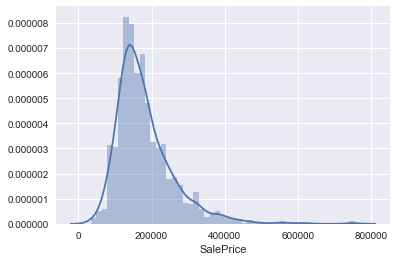

In [5]:
# do not fit kernel density estimate
sns.distplot(train_df["SalePrice"])

In [6]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Relationship with Numerical Variables


#### GrLivArea

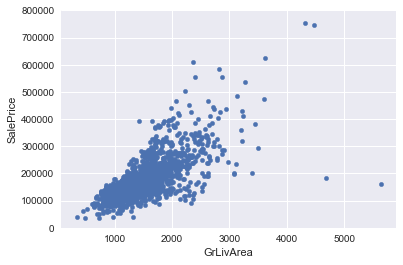

In [7]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

#### Year Sold

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64


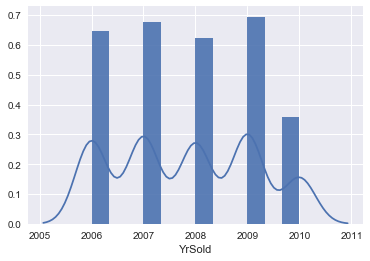

In [8]:
#draw a histogram and fit a kernel density estimate (KDE).
sns.distplot(train_df['YrSold'], hist_kws={'alpha': 0.9})
print(train_df["YrSold"].groupby(train_df["YrSold"]).count())


#### TotalBsmtSF

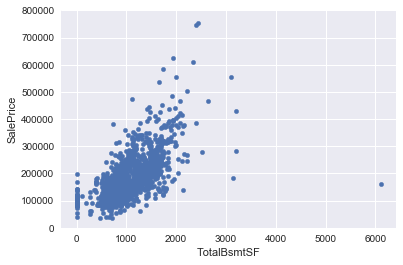

In [9]:
data = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

### Relationship with Categorical Data

### OverallQual

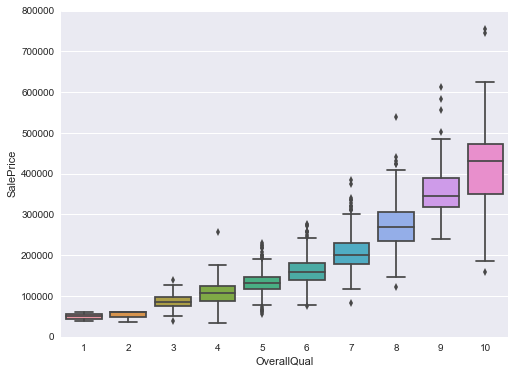

In [10]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

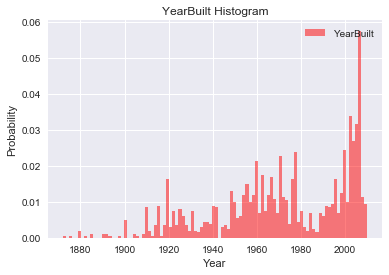

In [11]:
#Plot two sets of values on the same axis with a histogram.
#plt.hist(train['SalePrice'], bins=100, histtype='stepfilled', normed=True, color='b', label='SalePrice')
plt.hist(train_df['YearBuilt'], bins=100, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='YearBuilt')
plt.title("YearBuilt Histogram")
plt.xlabel("Year")
plt.ylabel("Probability")
plt.legend()
plt.show()

### Plasma Soup

In [12]:
#corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
# selecting without ID
corr = train_cont_df.iloc[:, 1:].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=1, square=True)

NameError: name 'train_cont_df' is not defined

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

### Missing Data

In [ ]:
# Training Data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
# Test Data
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
#dealing with missing data
# Training
train_df = train_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
print("Train data: ", train_df.isnull().sum().max()) #just checking that there's no missing data missing...

# Test
test_df = test_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
test_df = test_df.drop(test_df.loc[test_df['Electrical'].isnull()].index)
print("Test data: ", test_df.isnull().sum().max()) #just checking that there's no missing data missing...

### Outliers

#### Univariate Analysis

In [ ]:
train_df['SalePrice'].describe()

In [ ]:
# Standardizing data
stdSc = StandardScaler()
saleprice_scaled = stdSc.fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [ ]:
train_df['SalePrice'].describe()

In [ ]:
sns.distplot(saleprice_scaled)

### Bivariate Analysis

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#deleting points
train_df.sort_values(by = 'GrLivArea', ascending = False)[:4]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

### Search for Normality

In [ ]:
#histogram and normal probability plot
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [ ]:
#applying log transformation to remove positive skew
train_df['SalePrice'] = np.log(train_df['SalePrice'])

In [ ]:
train_df["SalePrice"].describe()

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(train_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

In [ ]:
#histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

In [ ]:
#data transformation
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

In [ ]:
#histogram and normal probability plot
sns.distplot(train_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot=plt)

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0
train_df.loc[train_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data
train_df.loc[train_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

In [ ]:
#histogram and normal probability plot
sns.distplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [ ]:
train_df.columns

In [ ]:
# Can now delete HasBsmt as it is doubly enocoding the data
train_df = train_df.drop("HasBsmt", 1)

In [ ]:
train_df["SalePrice"].describe()

### Apply log function to normalise all other numeric fields

In [ ]:
numerical_features = train_df.select_dtypes(exclude = ["object"]).columns
numerical_features

In [ ]:
remaining_cols = numerical_features.drop(["TotalBsmtSF","GrLivArea","SalePrice"])

In [ ]:
remaining_cols

In [ ]:
remaining_nums = train_df[remaining_cols]
skewness = remaining_nums.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_df[skewed_features] = np.log1p(remaining_nums[skewed_features])

In [ ]:
train_df["SalePrice"].describe()

### Normalise Test data

In [ ]:
remaining_cols = numerical_features.drop("SalePrice")
remaining_nums = test_df[remaining_cols]
skewness = remaining_nums.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
test_df[skewed_features] = np.log1p(remaining_nums[skewed_features])

### Test Homoscedasticity

In [ ]:
#scatter plot
plt.scatter(train_df['GrLivArea'], train_df['SalePrice']);

In [ ]:
#scatter plot
plt.scatter(train_df[train_df['TotalBsmtSF']>0]['TotalBsmtSF'], train_df[train_df['TotalBsmtSF']>0]['SalePrice']);

### Dummy Variables

In [ ]:
test_df.head()

In [ ]:
train_df.head()

In [ ]:
train_df.columns

In [ ]:
train_df = pd.get_dummies(train_df)
train_df.head()

In [ ]:
test_df = pd.get_dummies(test_df)
test_df.head()

In [ ]:
extra_cols = list(set(train_df.columns.tolist()) - set(test_df.columns.tolist()))
extra_cols

In [ ]:
# Drop columns which are in the training set but not in the test set
extra_cols.remove("SalePrice")
train_df = train_df.drop(extra_cols, 1)

In [ ]:
list(set(train_df.columns.tolist()) - set(test_df.columns.tolist()))

In [ ]:
test_df.loc[:, "GarageArea"] = test_df.loc[:, "GarageArea"].fillna(0)
test_df.loc[:, "GarageCars"] = test_df.loc[:, "GarageCars"].fillna(0)
test_df.loc[:, "BsmtUnfSF"] = test_df.loc[:, "BsmtUnfSF"].fillna(0)
test_df.loc[:, "BsmtFinSF1"] = test_df.loc[:, "BsmtFinSF1"].fillna(0)
test_df.loc[:, "BsmtFinSF2"] = test_df.loc[:, "BsmtFinSF2"].fillna(0)
test_df.loc[:, "TotalBsmtSF"] = test_df.loc[:, "TotalBsmtSF"].fillna(0)
test_df.loc[:, "SaleCondition_Partial"] = test_df.loc[:, "SaleCondition_Partial"].fillna("Normal")

In [ ]:
# Test Data
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

### Save Preprocessed Data

In [ ]:
train_df.to_csv("data/train_preprocessed.csv", index=False)
test_df.to_csv("data/test_preprocessed.csv", index=False)

### Model

In [ ]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

In [ ]:
train_df["SalePrice"].describe()

In [ ]:
y = train_df.SalePrice
train_df = train_df.drop("SalePrice",1)
numerical_features = numerical_features.drop("SalePrice")


In [ ]:
y.describe()

In [ ]:
# Partition the dataset in train + validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_val : " + str(X_val.shape))
print("y_train : " + str(y_train.shape))
print("y_val : " + str(y_val.shape))

In [ ]:
numerical_features

In [ ]:
# Standardize numerical features
# fit transform calculates the mean and standard deviation to use
# transform applies the normalisation using the calculated values
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

In [ ]:
X_train.head(5)

In [ ]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_val(model):
    rmse= np.sqrt(-cross_val_score(model, X_val, y_val, scoring = scorer, cv = 10))
    return(rmse)


### 1) Linear Regression

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_val(lr).mean())
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

In [ ]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_pred, y_val_pred - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_pred, y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

In [ ]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_val(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_val_rdg = ridge.predict(X_val)

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_rdg, y_val_rdg - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_rdg, y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [ ]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)


In [ ]:
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_val(lasso).mean())
y_train_las = lasso.predict(X_train)
y_val_las = lasso.predict(X_val)

In [ ]:
# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_las, y_val_las - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_las, y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [ ]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

In [ ]:
print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

In [ ]:
print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_val(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_val_ela = elasticNet.predict(X_val)

In [ ]:
# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_ela, y_val_ela - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val, y_val_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

### Predict Test Set on Best Model

In [ ]:
results_scaled = lasso.predict(test_df)
results_scaled_df = pd.DataFrame(results_scaled, index=test_df["Id"], columns=["SalePrice"])
results_scaled_df

In [ ]:
# X_train.loc[:] = stdSc.fit_transform(X_train.loc[:])
results_df = stdSc.inverse_transform(results_scaled_df['SalePrice'][:,np.newaxis]);


In [ ]:
results_df

### Submission Creation

In [ ]:
sub = results_df.to_csv("SalePrice.csv"")